In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, InputLayer
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [3]:
# MNIST データを読み込む
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [33]:
from PIL import Image
import numpy as np

# 元となる画像の読み込み
#img = Image.open('original.jpg')
#オリジナル画像の幅と高さを取得
#width, height = img.size
width, height = 28,28
# オリジナル画像と同じサイズのImageオブジェクトを作成する
img2 = Image.new('RGB', (width, height))

for i in range(height):
    for j in range(width):
        img2[i][j] = x_train[[0],[i*width+j]]


TypeError: 'Image' object is not subscriptable

In [4]:
# MNIST データを加工する
x_train = x_train.reshape(60000, 784)
x_test  = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train/= 255
x_test /= 255
y_train = keras.utils.to_categorical(y_train, 10)
y_test  = keras.utils.to_categorical(y_test, 10)

In [5]:
# Dense : 第1引数で出力の次元数を指定します。
# 入力の次元数はinput_shapeで指定します(指定しない場合は出力と同じ)
model = Sequential()
model.add(InputLayer(input_shape = (784,)))
model.add(Dense(10, activation = 'softmax'))

# モデルをコンパイルする
model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
# 学習
epochs = 20
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.5886 - acc: 0.8569 - val_loss: 0.3416 - val_acc: 0.9078
Epoch 2/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.3301 - acc: 0.9083 - val_loss: 0.2969 - val_acc: 0.9179
Epoch 3/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.3012 - acc: 0.9161 - val_loss: 0.2867 - val_acc: 0.9210
Epoch 4/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.2879 - acc: 0.9200 - val_loss: 0.2784 - val_acc: 0.9240
Epoch 5/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.2799 - acc: 0.9218 - val_loss: 0.2754 - val_acc: 0.9243
Epoch 6/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.2747 - acc: 0.9239 - val_loss: 0.2716 - val_acc: 0.9253
Epoch 7/20
60000/60000 [==============================] - 1s 19us/step - loss: 0

In [7]:
# 検証
score = model.evaluate(x_test, y_test, verbose = 1)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 24us/step

Test loss: 0.27116234516501425
Test accuracy: 0.9283


In [29]:
model.predict(x_test[[0][:]])

array([[8.6324604e-08, 2.3124647e-13, 3.6825050e-08, 7.6128263e-04,
        6.0045942e-08, 9.9434292e-06, 2.0160695e-15, 9.9903619e-01,
        2.3279024e-06, 1.9002358e-04]], dtype=float32)

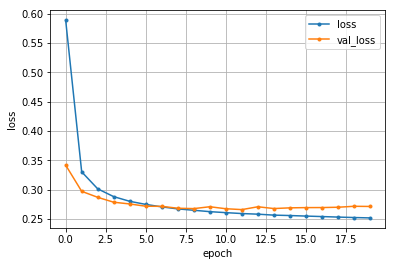

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

loss     = history.history['loss']
val_loss = history.history['val_loss']

nb_epoch = len(loss)
plt.plot(range(nb_epoch), loss, marker = '.', label = 'loss')
plt.plot(range(nb_epoch), val_loss, marker = '.', label = 'val_loss')
plt.legend(loc = 'best', fontsize = 10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()